In [87]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Params: n_papers = 1000, lr = 5, sm_runs_trsh = 0.99

# 1. SM-runs convergence

Chart shows the number of unclassified papers after i interactions

In [88]:
conv_data = pd.read_csv('../output/data/convergence_test.csv')

In [89]:
x_conv = range(1, 51)
y1 = conv_data.iloc[0].values[2:] #Nt=3 J=3
y2 = conv_data.iloc[1].values[2:] #Nt=3 J=5
y3 = conv_data.iloc[2].values[2:] #Nt=5 J=3
y4 = conv_data.iloc[3].values[2:] #Nt=5 J=5

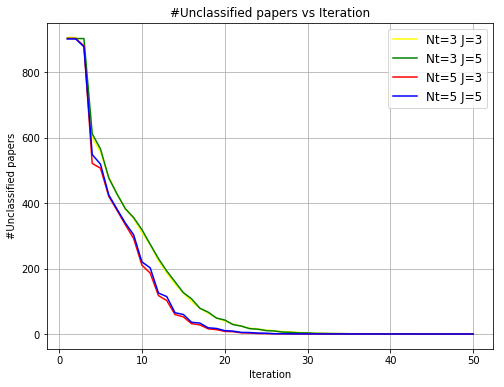

In [90]:
fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['yellow', 'green', 'red', 'blue', 'red'])
plt.plot(x_conv, y1)
plt.plot(x_conv, y2)
plt.plot(x_conv, y3)
plt.plot(x_conv, y4)
plt.legend(['Nt=3 J=3', 'Nt=3 J=5', 'Nt=5 J=3', 'Nt=5 J=5'], loc='upper right', fontsize = 12)
plt.ylabel('#Unclassified papers')
plt.xlabel('Iteration')
plt.title('#Unclassified papers vs Iteration')
plt.grid()
plt.show()

# 2. SM-runs baseline round

The chart depicts Loss vs Price trade off for the proportion of papers p used in baseline iteration (p=0.1 means 10% from I). Each dot reflects the number of votes per criteria J. J = [1, ..., 10], lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

In [116]:
br = pd.read_csv('../output/data/baseline_round.csv')

In [117]:
br = br.loc[br['alg'] == 'SM-runs']

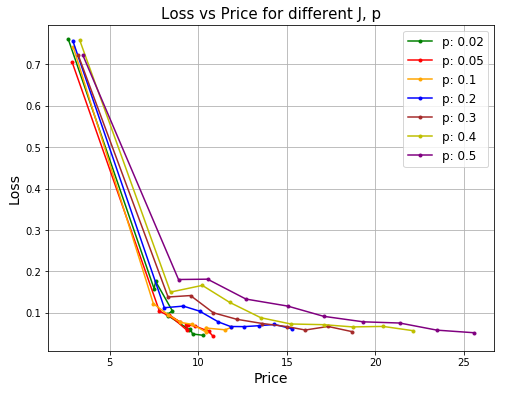

In [121]:
fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['green', 'red', 'orange', 'blue', 'brown', 'y', 'purple'])
labels = br['fr_p'].unique()
for fr_p in labels:
    x = br.loc[br['fr_p'] == fr_p]['price_mean']
    y=br.loc[br['fr_p'] == fr_p]['loss_mean']
    plt.plot(x, y, label='p: {}'.format(fr_p), marker='.')
plt.title('Loss vs Price for different J, p', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

--> p = 0.05 (for n_papers = 1000) looks as the optimal choice.

# 3. Performance of the algorithms

Loss vs Nt for baseline, M-runs, SM-runs. J = [3, 5], p = 0.1, lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

In [94]:
data = pd.read_csv('../output/data/loss_tests_lr5.csv')

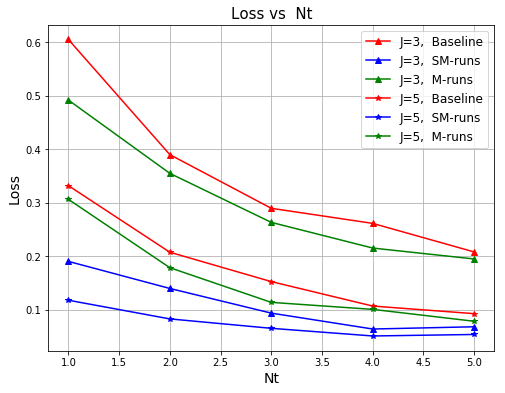

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['red', 'blue', 'green'])
x = [1, 2, 3, 4, 5]
J_arr = [3, 5]
algs_arr = ['Baseline', 'SM-runs', 'M-runs']

def plot_alg(J, marker):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values[:5]
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(3, '^')
plot_alg(5, '*')
    
plt.title('Loss vs  Nt', size=15)
plt.xlabel('Nt', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

# 4. Loss vs Price

J = [3, 5, 10], Nt = [1,..., 10], p = 0.1, lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

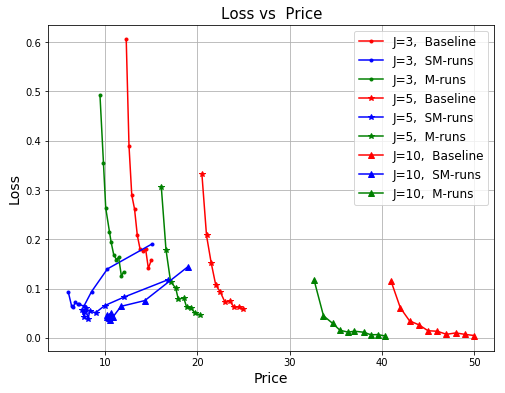

In [108]:
fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['red', 'blue', 'green'])
J = [3, 5, 10]
algs_arr = ['Baseline', 'SM-runs', 'M-runs']

def plot_alg(J, marker):
    for alg in algs_arr:
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker)
        
plot_alg(3, '.')
plot_alg(5, '*')
plot_alg(10, '^')

plt.title('Loss vs  Price', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

For Baseline, M-runs Nt=1 corresponds to the highest losses/lowest prices, Nt=10 to the lowest losses/highest prices. But for SM-runs Nt=10 corresponds to the lowest losses/prices! 